# SELIC Annotation Pie Chart

Minimal view: loads `selic` table and shows annotation distribution as a pie chart.

In [8]:
DUCKDB_PATH = "../data/finance.duckdb"  # adjust if running outside container
TABLE_NAME = "selic"
DATE_COLUMN = "data"
VALUE_COLUMN = "valor"
ANNOTATION_COLUMN = "annotation"

In [9]:
import duckdb, pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

assert Path(DUCKDB_PATH).exists(), f"DuckDB path not found: {DUCKDB_PATH}"
con = duckdb.connect(DUCKDB_PATH)
df = con.execute(f"SELECT * FROM {TABLE_NAME}").df()
con.close()
print(f"Loaded {len(df)} rows.")
df.head()

Loaded 9 rows.


,data,valor,annotation
0,01/04/2024,0.040168,"omg, Brasil will blow up"
1,01/04/2024,0.040168,"omg, Brasil will blow up"
2,01/08/2024,0.039270,"omg, Brasil will blow up"
3,01/03/2024,0.041957,"omg, Brasil will blow up"
4,01/10/2024,0.040168,"omg, Brasil will blow up"


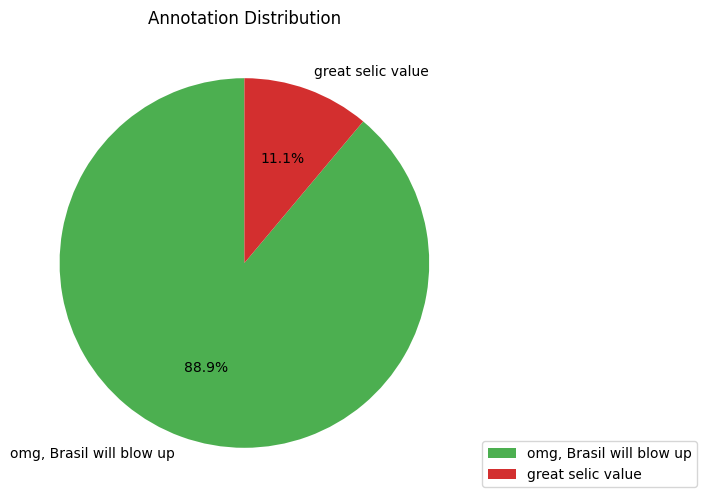

In [11]:
# Pie chart of annotations
if ANNOTATION_COLUMN in df.columns:
    counts = df[ANNOTATION_COLUMN].value_counts()
    plt.figure(figsize=(6,6))
    counts.plot(kind='pie', autopct='%1.1f%%', startangle=90,
                colors=['#4CAF50', '#D32F2F'])
    plt.ylabel('')
    plt.title('Annotation Distribution')
    plt.legend(counts.index, loc='lower left', bbox_to_anchor=(1,0))
else:
    print(f"Column '{ANNOTATION_COLUMN}' not found")